In [6]:
import pandas as pd
df = pd.read_csv("Housing.csv")
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


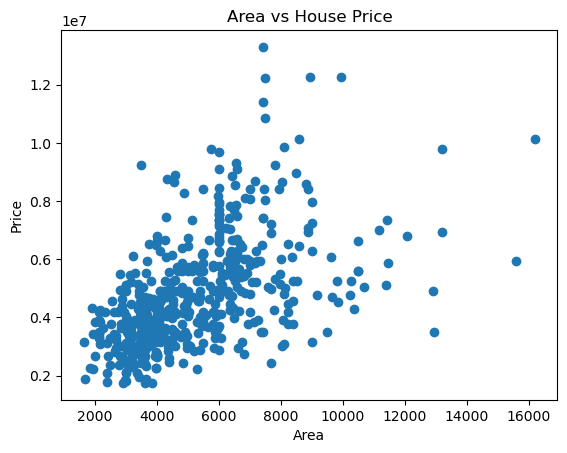

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df["area"], df["price"])
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs House Price")
plt.show()

In [8]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
binary_cols = [ "mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea" ]
df[binary_cols] = (
    df[binary_cols]
    .replace({"yes": 1, "no": 0})
    .infer_objects(copy=False)
)
df.head()

C:\Users\vinay\AppData\Local\Temp\ipykernel_13576\3814633001.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({"yes": 1, "no": 0})


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [10]:
if "furnishingstatus" in df.columns:

    df["furnished"] = 0
    df["semi_furnished"] = 0
    df["unfurnished"] = 0

    df.loc[df["furnishingstatus"] == "furnished", "furnished"] = 1
    df.loc[df["furnishingstatus"] == "semi-furnished", "semi_furnished"] = 1
    df.loc[df["furnishingstatus"] == "unfurnished", "unfurnished"] = 1

    df.drop(columns=["furnishingstatus"], inplace=True)
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi_furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,0,1,0
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,0,1,0
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0,0,1
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,1,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0,0,1


In [11]:
df.describe().round(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi_furnished,unfurnished
count,545.00,545.00,545.00,545.00,545.00,545.00,545.00,545.00,545.00,545.00,545.00,545.00,545.00,545.00,545.00
mean,4766729.25,5150.54,2.97,1.29,1.81,0.86,0.18,0.35,0.05,0.32,0.69,0.23,0.26,0.42,0.33
std,1870439.62,2170.14,0.74,0.50,0.87,0.35,0.38,0.48,0.21,0.47,0.86,0.42,0.44,0.49,0.47
min,1750000.00,1650.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3430000.00,3600.00,2.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,4340000.00,4600.00,3.00,1.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,5740000.00,6360.00,3.00,2.00,2.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00
max,13300000.00,16200.00,6.00,4.00,4.00,1.00,1.00,1.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00


In [12]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=["price"])
y = df["price"]

num_cols = ["area", "bedrooms", "bathrooms", "stories", "parking"]

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
X.head() 
# pd.concat([X, y], axis=1).head()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi_furnished,unfurnished
0,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,1,0,0
1,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,1,0,0
2,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,0,1,0
3,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,1,0,0
4,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,1,0,0


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
model.coef_

array([ 511615.56377666,   56615.57245779,  549420.50124098,
        353158.42985604,  367919.94767957,  231610.03717565,
        390251.17618109,  684649.88533879,  791426.73584319,
        193542.78167455,  629890.56531336,  180175.62660444,
         53293.80901933, -233469.43562378])

In [16]:
model.intercept_

np.float64(3822246.533801672)

In [17]:
y_pred = model.predict(X_test)
y_pred[:5]


array([5164653.90033967, 7224722.29802166, 3109863.24240338,
       4612075.3272256 , 3294646.25725956])

In [18]:
model.score(X_test, y_test)


0.6529242642153176

In [19]:
cols_to_drop = ['guestroom', 'hotwaterheating', 'airconditioning', 'prefarea', 'unfurnished']
X_reduced = X.drop(columns=cols_to_drop)

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

model_red = LinearRegression()
model_red.fit(X_train_r, y_train_r)
r2_reduced = model_red.score(X_test_r, y_test_r)

print("R² after removing features:", r2_reduced)


R² after removing features: 0.5729482414108971


In [20]:
df["price_per_sqft"] = df["price"] / df["area"]


In [21]:
df["area_per_room"] = df["area"] / df["bedrooms"]


In [22]:
df["total_rooms"] = df["bedrooms"] + df["bathrooms"]


In [23]:
df["amenities_score"] = (
    df["airconditioning"]
    + df["guestroom"]
    + df["basement"]
    + df["hotwaterheating"]
)


In [28]:
X = df.drop(columns=["price"])
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.885902951011357